
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    This contains my output for the homework on lecture 4
Description Edit:
    I misunderstood the homework for lecture 4. I thought I need to use the encoder.
    But I realized that the homework should be like the flower classification in lecture 3
    
Homework Goals:
    - Use the mnist dataset for classification
    - Display the confidence level on the prediction
    - Display the next most likely prediction

Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 4
    Retrieved from: https://www.youtube.com/watch?v=zhwQXbWANkw&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=5


In [1]:
#---------- Importing Packages 
# Import packages and use tensorflow version 2.x
#%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)



 Shape of training features:  (60000, 28, 28)
 Shape of training ground truths:  (60000,)


 Shape of test features:  (10000, 28, 28)
 Shape of test ground truths:  (10000,)




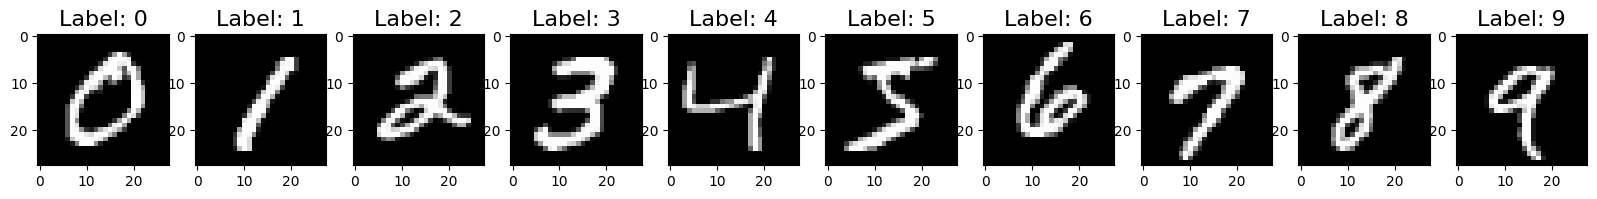

In [2]:
# TAKE THE MNIST DATASET
# mnist data of grayscale images of handwritten digits
(x_train, y_train) , (x_test, y_test) = mnist.load_data()


# Check if the shape is uniform
print( "\n======================================================================\n" )
print( " Shape of training features: ", x_train.shape )
print( " Shape of training ground truths: ", y_train.shape)
print( "\n======================================================================\n" )
print( " Shape of test features: ", x_test.shape )
print( " Shape of test ground truths: ", y_test.shape)
print( "\n======================================================================\n" )


# Display 10 classes
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  # print( y_train[i])

In [3]:
# Add the categories
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0


print( "\n======================================================================\n" )
print( " BEFORE RESHAPING: \n")
print( " Shape of training features: ", x_train.shape )
print( " Shape of test features: ", x_test.shape)
print( "\n======================================================================\n" )

# Reshape Data
# Here we will make each pixel a feature
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print( "\n======================================================================\n" )
print( " AFTER RESHAPING: \n")
print( " Shape of training features: ", x_train.shape )
print( " Shape of test features: ", x_test.shape)
print( "\n======================================================================\n" )



 BEFORE RESHAPING: 

 Shape of training features:  (60000, 28, 28)
 Shape of test features:  (10000, 28, 28)




 AFTER RESHAPING: 

 Shape of training features:  (60000, 784)
 Shape of test features:  (10000, 784)




In [4]:
# Create the model
# This model has an input layer that takes in the 784 features of the 28*28 image
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu' , name="Input_Layer"))
model.add(Dense(units=128, activation='relu', name="dense_01"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax', name="Output_Layer"))

# Compile the model and track the accuracy
# After that, display the summary
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 128)               100480    
                                                                 
 dense_01 (Dense)            (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 Output_Layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 9s 39ms/step - loss: 0.5932 - accuracy: 0.8297
Epoch 2/10
118/118 [==============================] - 4s 36ms/step - loss: 0.2222 - accuracy: 0.9351
Epoch 3/10
118/118 [==============================] - 4s 38ms/step - loss: 0.1636 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 5s 43ms/step - loss: 0.1322 - accuracy: 0.9617
Epoch 5/10
118/118 [==============================] - 5s 40ms/step - loss: 0.1080 - accuracy: 0.9686
Epoch 6/10
118/118 [==============================] - 5s 41ms/step - loss: 0.0928 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0791 - accuracy: 0.9766
Epoch 8/10
118/118 [==============================] - 5s 38ms/step - loss: 0.0690 - accuracy: 0.9795
Epoch 9/10
118/118 [==============================] - 4s 37ms/step - loss: 0.0615 - accuracy: 0.9815
Epoch 10/10
118/118 [==============================] - 5s 41ms/step - loss: 0.0541 - accura

In [7]:
# Evaluate the model using the testing data
test_loss, test_acc = model.evaluate(x_test, y_test)
print( "\n======================================================================\n" )
print( " EVALUATION \n")
print( " Test Loss: ", test_loss )
print( " Test Accuracy: ", test_acc)
print( "\n======================================================================\n" )

313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9762


 EVALUATION 

 Test Loss:  0.07343648374080658
 Test Accuracy:  0.9761999845504761




313/313 [==============================] - 2s 5ms/step


 PREDICTION 

 True Class:  0
 Most Likely Predictions: 
          Number:  2
          Confidence:  0.046734578791074455
          Number:  0
          Confidence:  99.95038509368896


[9.99503851e-01 3.05363142e-06 4.67345788e-04 5.31409569e-06
 2.91670358e-06 1.06224704e-07 5.82313851e-06 2.21769665e-06
 8.76342710e-06 7.08935431e-07]


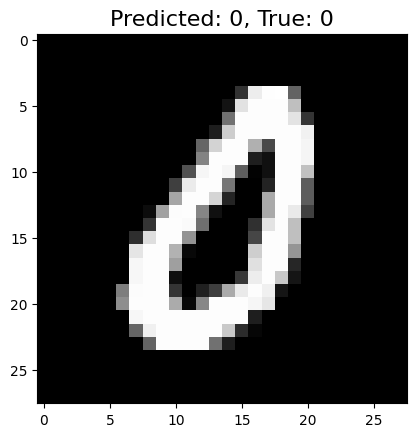

In [40]:
# Start predicting using the a random data from the testing data
predictionResult = model.predict(x_test) # An array of all the predictions on our test data
y_pred_classes = np.argmax(predictionResult, axis=1)


# Choose a random test data (random index)
random_idx = np.random.choice(len(x_test))

# Get the prediction result of the random test data
result = predictionResult[random_idx]
# Get the features of the random test data
x_sample = x_test[random_idx]
# Get the correct result for the random test data
correct_class = y_test[random_idx]
correct_class = np.argmax(correct_class)

# Get the data for the 2 most likely prediction
top_pred = np.argpartition( result, -2)[-2:]
top_conf = result[top_pred]

# Get the data for the most likely prediction
first_pred = np.argmax(result)
first_conf = result[first_pred]

# Get the data for the 2 most likely prediction
top_pred = np.argpartition( result, -2)[-2:]


plt.title("Predicted: {}, True: {}".format(first_pred, correct_class), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

print( "\n======================================================================\n" )
print( " PREDICTION \n")
print( " True Class: ", correct_class)
print( " Most Likely Predictions: " )
for pred in top_pred:
    print( "          Number: " , pred)
    print( "          Confidence: " , result[pred] * 100) 
print( "\n======================================================================\n" )
print( result)
